In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

In [10]:
from sklearn.decomposition import PCA

In [3]:
%pip install pandas-datareader 

Note: you may need to restart the kernel to use updated packages.


In [31]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

# <b> 주성분분석 실습 예제 : Iris 데이터</b>

    입력 인수:
        n_components : 정수
        
    메서드:
        fit_transform() : 특징행렬을 낮은 차원의 근사행렬로 변환
        inverse_transform() : 변환된 근사행렬을 원래의 차원으로 복귀
        
    속성:
        mean_ : 평균 벡터
        components_ : 주성분 벡터

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

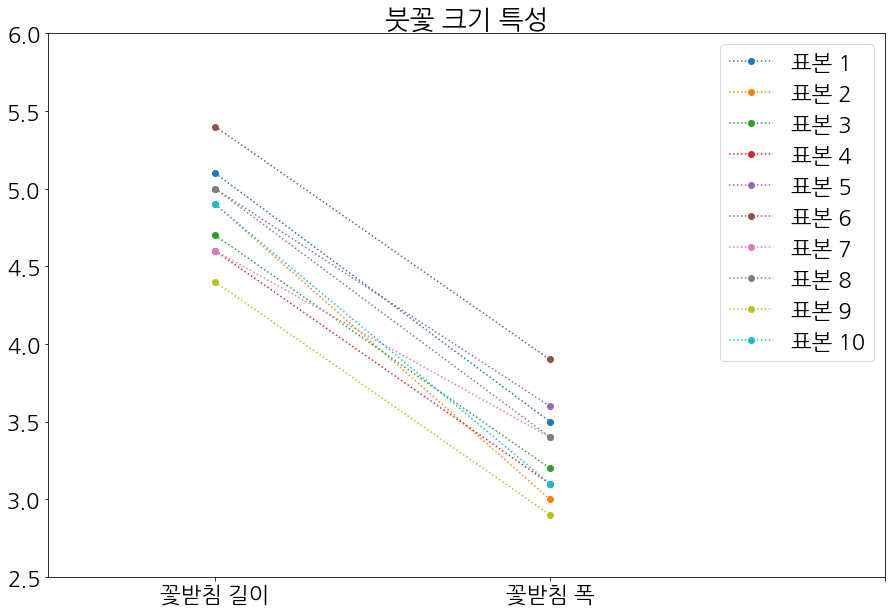

In [32]:
plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

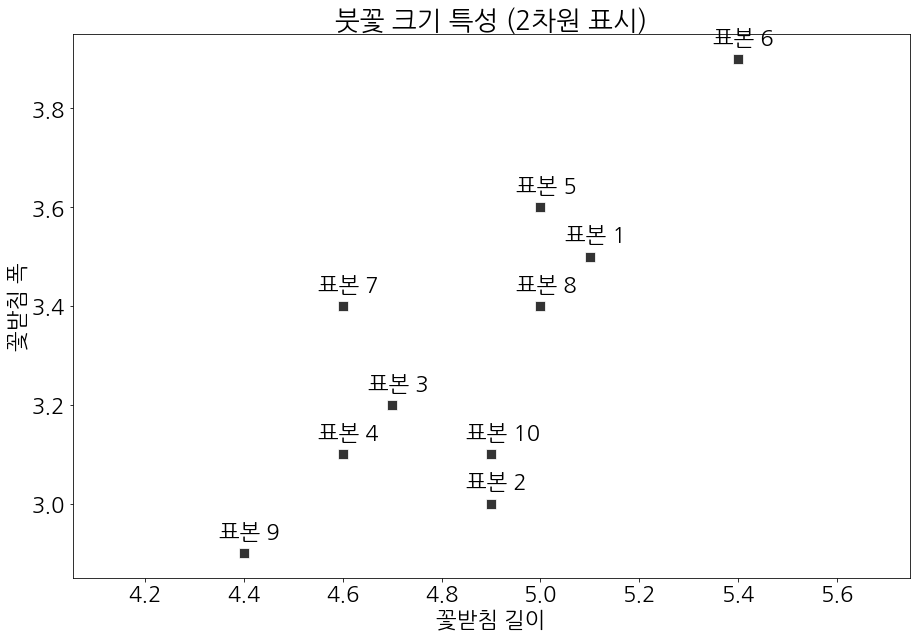

In [35]:
# plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()

In [37]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X) # 저차원 데이터
X_low # 크기를 나타내는 값, 잠재변수

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

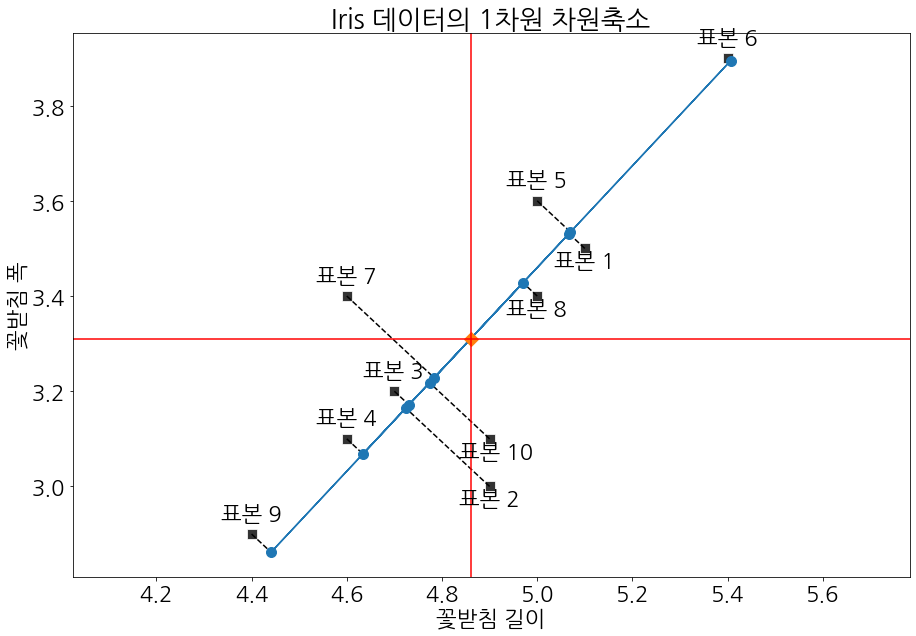

In [34]:
X2 = pca1.inverse_transform(X_low)

# plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r') 
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

In [38]:
pca1.mean_ # 데이터들의 평균 위치

array([4.86, 3.31])

In [39]:
pca1.components_ # 기저벡터의 방향을 나타내는 벡터

array([[0.68305029, 0.73037134]])

In [40]:
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [41]:
VT[:, 0]

array([-0.68305029, -0.73037134])

In [45]:
X_low[0] # 첫번째 데이터의 PCA 주성분 값

array([0.30270263])

In [46]:
X2[0, :] # 주 성분값을 2차원으로 다시 근사시킨 값

array([5.06676112, 3.53108532])

# <b> 주성분분석 실 사례 : 주가 PCA 분석 </b>

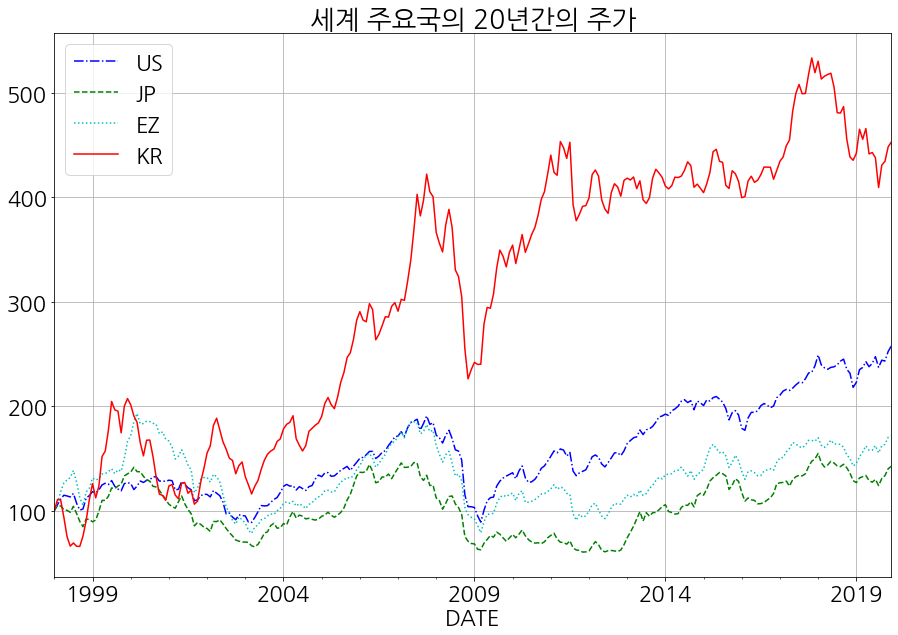

In [27]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2019, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"] # 그래프 라인 타입
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.grid(True)
plt.show()

### <b>연간 주식 수익률 데이터를 구하면 특징 행렬을 구할 수 있다.</b>

In [6]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


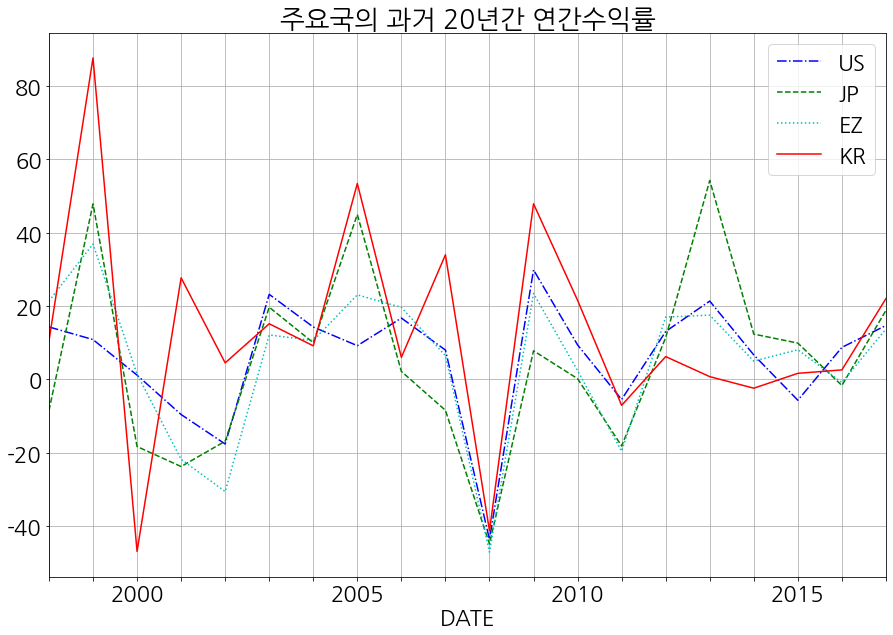

In [26]:
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.grid(True)
plt.show()

#### <b>차원은 20차원이지만 각 표본이 가지는 측정 데이터 벡터의 모양(비율)이 비슷하다는 것을 알 수 있다.<br><br> 각 나라의 수익률은 "경제적 요인"이라고 하는 공통된 잠재변수에 의해서 결정되기 때문이다.</b>

In [12]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)
w

array([[-33.4137842 ],
       [-20.94319729],
       [-26.91770195],
       [ 81.27468344]])

In [13]:
m = pca2.mean_
m

array([  9.35024903,  45.7748003 , -15.71779759,  -6.91967355,
       -15.20108361,  17.48765584,  10.95568389,  32.60609686,
        11.08048721,   9.94632162, -44.28095456,  27.19782058,
         8.32897696, -12.63319273,  11.86532327,  23.41445161,
         5.34108071,   3.42888451,   2.14468408,  17.2613721 ])

In [14]:
p1 = pca2.components_[0]
p1

array([-0.00270658,  0.53651512, -0.39468113,  0.41148841,  0.23991661,
       -0.0315062 , -0.02577946,  0.27841406, -0.07254126,  0.28104992,
        0.03493189,  0.23635416,  0.15424312,  0.05797757, -0.0706337 ,
       -0.2543979 , -0.09127243, -0.01132363, -0.00264183,  0.06046709])

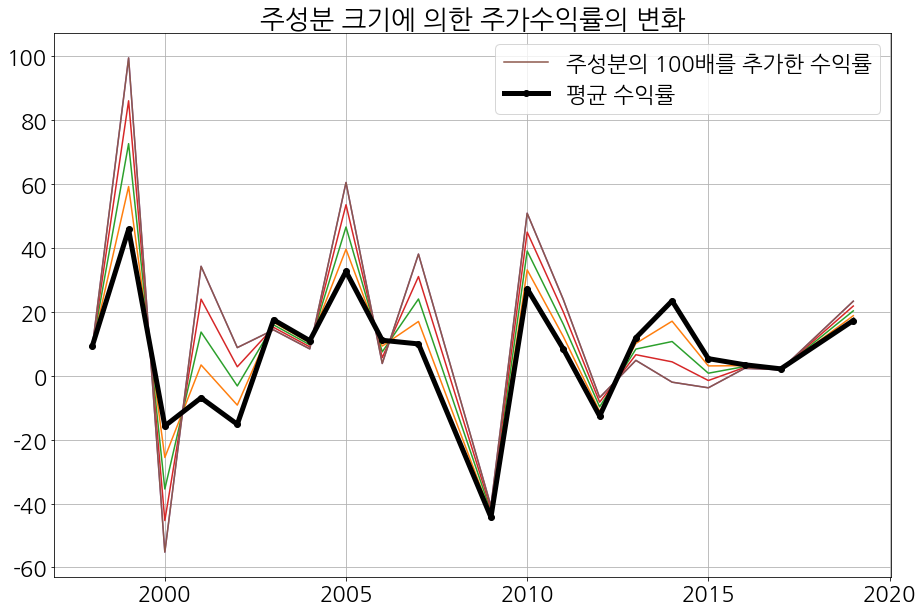

In [25]:
xrange = np.linspace(1998, 2019, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.grid(True)
plt.show()

<b>
평균주가로부터 주성분이 더해질수록 어떻게 주가의 형태가 바뀌는지 살펴보면 굵은 선으로 표시된 주가가 평균 주가이고 나머지 주가는 주성분이 점점 많이 추가됨에 따라 <br>
어떤 주가 형태로 변하는지를 표시한 것이다. 여기에서는 주성분의 모습을 잘 보기 위해 주성분을 과장하여 추가하였다.</b>

In [22]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -33.413784
JP -20.943197
EZ -26.917702
KR  81.274683


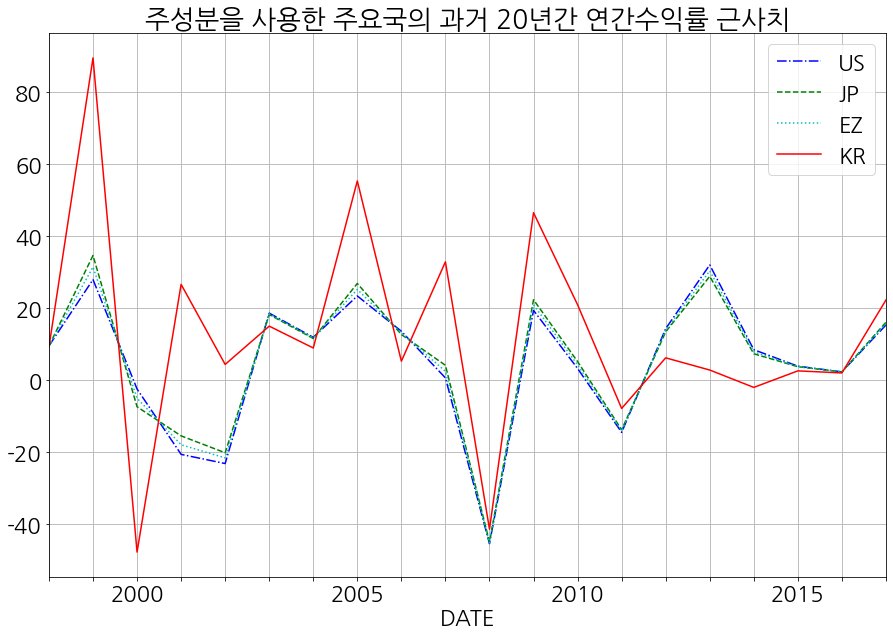

In [24]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.grid(True)
plt.show()